In [25]:
!pip install qiskit pylatexenc qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 74.3 MB/s eta 0:00:00


In [7]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.quantum_info import Operator
import numpy as np

In [9]:
qc = QuantumCircuit(3)

qc.h([2]);
qc.cx(1,2);
qc.tdg([2]);
qc.cx(0,2);
qc.t([2]);
qc.cx(1,2);
qc.tdg([2]);
qc.cx(0,2);
qc.barrier()
qc.tdg([1]); qc.t([2]);
qc.cx(0,1); qc.h([2])
qc.tdg([1]);
qc.cx(0,1);
qc.t([0]); qc.s([1]);

print("Quantum Circuit:")
print(qc)
print("-" * 30)
qc.draw(output="latex_source", filename="out")

unitary_operator = Operator(qc)

final_matrix = unitary_operator.data
np.set_printoptions(precision=1, suppress=True, linewidth=np.inf)

print("Final Unitary Matrix:")
print(final_matrix)

Quantum Circuit:
                                                  ░                         »
q_0: ───────────────────■─────────────────────■───░──────────■───────────■──»
                        │                     │   ░ ┌─────┐┌─┴─┐┌─────┐┌─┴─┐»
q_1: ───────■───────────┼─────────■───────────┼───░─┤ Tdg ├┤ X ├┤ Tdg ├┤ X ├»
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌─────┐┌─┴─┐ ░ └┬───┬┘├───┤└─────┘└───┘»
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├─░──┤ T ├─┤ H ├────────────»
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘ ░  └───┘ └───┘            »
«     ┌───┐
«q_0: ┤ T ├
«     ├───┤
«q_1: ┤ S ├
«     └───┘
«q_2: ─────
«          
------------------------------
Final Unitary Matrix:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+

Quantum Circuit:
     ┌───┐┌───┐┌───┐┌─┐                          
q_0: ┤ Z ├┤ H ├┤ Z ├┤M├──────────────────────────
     ├───┤├───┤└───┘└╥┘  ┌──────  ┌───┐ ───────┐ 
q_1: ┤ H ├┤ H ├──────╫───┤ If-0  ─┤ X ├  End-0 ├─
     └───┘└───┘      ║   └──╥───  └───┘ ───────┘ 
                     ║ ┌────╨────┐               
c: 1/════════════════╩═╡ c_0=0x1 ╞═══════════════
                     0 └─────────┘               
------------------------------


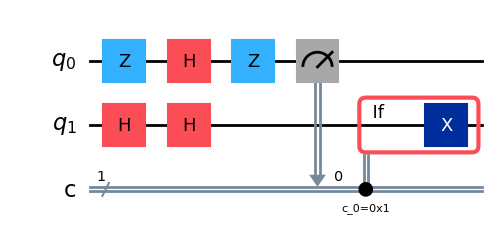

In [44]:
def create_qc(qc):
    qc.h([1]); qc.z([0])
    qc.h([1]); qc.h([0])
    qc.z([0])

    qc.measure(0, 0)
    with qc.if_test((qc.clbits[0], 1)):
        qc.x(1)

qc = QuantumCircuit(2,1)
create_qc(qc)
print("Quantum Circuit:")
print(qc)
print("-" * 30)

In [41]:
input_states = ['00', '01', '10', '11']
circuits_to_run = []

for state in input_states:
    qc = QuantumCircuit(2, 1, name=f'input_{state}')
    if state[1] == '1':
        qc.x(0)
    if state[0] == '1':
        qc.x(1)
    create_qc(qc)
    circuits_to_run.append(qc)

sampler = Sampler()
job = sampler.run(circuits_to_run, shots=1024)
result = job.result()

print("--- Simulation Results ---")
for i, circuit in enumerate(circuits_to_run):
    counts = result.quasi_dists[i].binary_probabilities()
    print(f"\nInput: |{circuit.name.split('_')[1]}>")
    print(f"  Output Counts: {counts}")

--- Simulation Results ---

Input: |00>
  Output Counts: {'0': 0.52734375, '1': 0.47265625}

Input: |01>
  Output Counts: {'0': 0.490234375, '1': 0.509765625}

Input: |10>
  Output Counts: {'1': 0.482421875, '0': 0.517578125}

Input: |11>
  Output Counts: {'0': 0.4775390625, '1': 0.5224609375}
